# Analysis of digitized base circles

In [1]:
# Python base
from itertools import count
from pathlib import Path
from pickle import loads
from textwrap import wrap
from warnings import filterwarnings

# Data analysis
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

/home/nialov/.local/share/virtualenvs/trace_repo-280iuCPs/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [2]:
filterwarnings("ignore")

In [3]:
# fractopo-subsampling imports
import fractopo_subsampling.utils as utils
import fractopo_subsampling.plotting_utils as plotting_utils
from fractopo.analysis.network import Network
from fractopo.analysis import length_distributions

# local config file (./subsampling_config.py)
import subsampling_config

## Read data

In [4]:
traces = [
    "../ahvenanmaa/traces/20m/Getaberget_20m_4_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_9_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_8_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_7_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_7_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_5_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_2_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_2_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_1_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_1_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_1_traces.gpkg",
    "../ahvenanmaa/traces/20m/Getaberget_20m_1_traces.gpkg",
    "../ahvenanmaa/traces/20m/Havsvidden_20m_traces.gpkg",
]
areas = [
    "../ahvenanmaa/areas/20m/Getaberget_20m_4_3_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_9_2_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_8_3_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_7_1_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_7_2_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_5_1_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_2_1_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_2_2_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_1_1_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_1_2_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_1_3_area.gpkg",
    "../ahvenanmaa/areas/20m/Getaberget_20m_1_4_area.gpkg",
    "../ahvenanmaa/areas/20m/Havsvidden_20m_1_area.gpkg",
]
assert len(traces) == len(areas)
assert len(set(areas)) == len(areas)

In [5]:
networks = []
for trace_path, area_path in zip(traces, areas):
    traces_gdf, area_gdf = gpd.read_file(trace_path), gpd.read_file(area_path)
    network = Network(
        trace_gdf=traces_gdf,
        area_gdf=area_gdf,
        determine_branches_nodes=True,
        circular_target_area=True,
        truncate_traces=True,
        name=Path(area_path).stem,
        snap_threshold=0.001,
    )
    networks.append(network)

ERROR:root:Expected 0, 2 or 3 intersects. V-node or similar error at POINT (107689.893666384 6720111.671640391).


In [6]:
def setup_ax_for_ld(ax, fig):
    """
    Configure ax for length distribution plots.

    :param ax: Ax to setup.
    :type ax: Axes
    """
    #
    handles, labels = ax.get_legend_handles_labels()
    labels = ["\n".join(wrap(label, 13)) for label in labels]
    lgnd = plt.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.65, 0.2),
        ncol=2,
        columnspacing=0.3,
        shadow=True,
        prop={"size": "medium"},
        bbox_transform=fig.transFigure,
    )
    for lh in lgnd.legendHandles:
        # lh._sizes = [750]
        lh.set_linewidth(3)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Calculating best minimal value for power 

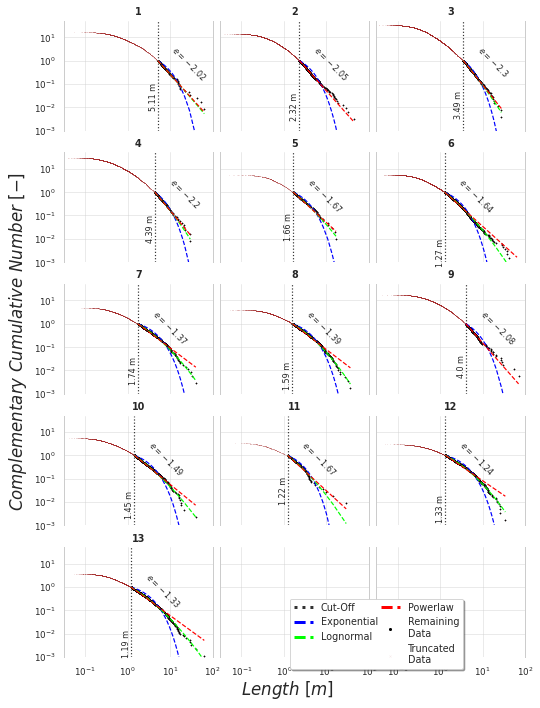

In [7]:
# Set seaborn theme
sns.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.0,
    rc={"grid.alpha": 0.5, "axes.spines.bottom": False, "axes.spines.top": False},
)

fig, axes = plt.subplots(
    5, 3, figsize=utils.paper_figsize(1.0), sharex=True, sharey=True
)
network_table = []
idxs = range(len(networks))
for idx, (network, ax) in zip(idxs, zip(networks, axes.flatten())):

    fit = plotting_utils.plot_distribution_fits(
        length_array=network.trace_length_array,
        fit=network.trace_lengths_powerlaw_fit(),
        ax=ax,
    )
    ax.set_title(f"{idx+1}", fontdict=dict(fontweight="bold"))
    ax.set_xlim(10 ** -1.5, 10 ** 2)
    ax.set_ylim(10 ** -3, 10 ** 1.7)
    num_desc = network.numerical_network_description()
    diameter = 2 * np.sqrt(sum(network.area_gdf.geometry.area) / np.pi)
    network_values = {
        key: value for key, value in num_desc.items() if key in utils.Utils.table_params
    }
    network_values["Diameter"] = int(round(diameter, 0))
    network_table.append(network_values)
    

    
fig.text(0.5, 0.08, r"$Length\ [m]$", fontsize="xx-large", ha="center")
fig.text(0.03, 0.5, r"$Complementary\ Cumulative\ Number\ [-]$", fontsize="xx-large", rotation=90, va="center")

plt.subplots_adjust(wspace=0.05)
setup_ax_for_ld(ax=ax, fig=fig)

plt.savefig("../results/base_circle_powerlaw_fits.svg", bbox_inches="tight")

In [8]:
network_df = pd.DataFrame(network_table, index=range(1, 14))
round_two = lambda val: round(val, 2)
for column, dtype, func in zip(
    (
        "Number of Traces",
        "Number of Branches",
        "Dimensionless Intensity B22",
        "Connections per Branch",
        "trace power_law vs. lognormal R",
        "trace power_law vs. lognormal p",
        "trace power_law exponent",
        "trace power_law cut-off",
        "Fracture Intensity P21",
        "Trace Mean Length",
        "Branch Mean Length",
    ),
    (int, int, float, float, float, float, float, float, float, float, float),
    (
        None,
        None,
        round_two,
        round_two,
        round_two,
        lambda val: round(val, 3),
        round_two,
        round_two,
        round_two,
        round_two,
        round_two,
    ),
):
    if func is not None:
        network_df[column] = network_df[column].apply(func)
    network_df[column] = network_df[column].astype(dtype)

In [9]:
network_df.columns

Index(['X', 'Y', 'I', 'E', 'C - C', 'C - I', 'I - I',
       'trace power_law vs. lognormal R', 'trace power_law vs. lognormal p',
       'trace power_law exponent', 'trace power_law cut-off',
       'Number of Traces', 'Number of Branches', 'Fracture Intensity P21',
       'Trace Mean Length', 'Branch Mean Length',
       'Dimensionless Intensity B22', 'Connections per Branch', 'Diameter'],
      dtype='object')

In [10]:
transposed_network_df = (
    network_df[
        # Assign order of columns in final DataFrame
        [
            "Diameter",
            "Number of Traces",
            "Number of Branches",
            "Trace Mean Length",
            "Branch Mean Length",
            "X",
            "Y",
            "I",
            "E",
            "C - C",
            "C - I",
            "I - I",
            "Fracture Intensity P21",
            "Dimensionless Intensity B22",
            "Connections per Branch",
            "trace power_law exponent",
            "trace power_law cut-off",
            "trace power_law vs. lognormal R",
            "trace power_law vs. lognormal p",
        ]
    ]
    .rename(
        columns={
            "trace power_law exponent": "Trace Power-law Exponent",
            "trace power_law vs. lognormal R": "Trace Power-law vs. Lognormal R",
            "trace power_law vs. lognormal p": "Trace Power-law vs. Lognormal p",
            "trace power_law cut-off": "Trace Power-law Cut-off",
        }
    )
    .astype(object)
    .transpose()
)

In [11]:
transposed_network_df

,1,2,3,4,5,6,7,8,9,10,11,12,13
Diameter,50,50,50,50,20,50,40,50,50,40,20,50,50
Number of Traces,1856,4465,8419,3605,550,7319,1622,2225,2953,2249,358,1739,3291
Number of Branches,4264,10215,19588,7408,1149,18631,3511,4546,6605,4843,590,3712,7391
Trace Mean Length,1.5,0.86,0.77,0.94,0.98,0.83,1.26,1.35,1.18,0.95,1.0,1.53,1.15
Branch Mean Length,0.67,0.38,0.34,0.47,0.5,0.33,0.6,0.69,0.54,0.45,0.64,0.74,0.53
X,507,1259,2299,638,94,2223,272,372,674,441,37,318,635
Y,1394,3232,6571,2527,411,6866,1345,1577,2304,1712,158,1337,2830
I,2319,5699,10267,4683,690,7772,1899,2874,3603,2786,558,2141,3753
E,111,143,255,132,63,228,118,159,143,116,40,118,151
C - C,2333,5440,10951,3600,578,11923,1939,2210,3529,2562,174,1961,4273


In [12]:
transposed_network_df.to_csv("../results/base_circle_table.csv")